# License 
***
Copyright (C) 2017 J. Patrick Hall, jphall@gwu.edu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [1]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

import operator

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_201"; Java(TM) SE Runtime Environment (build 1.8.0_201-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from /home/patrickh/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpioaeowke
  JVM stdout: /tmp/tmpioaeowke/h2o_patrickh_started_from_python.out
  JVM stderr: /tmp/tmpioaeowke/h2o_patrickh_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,2 months and 16 days
H2O cluster name:,H2O_from_python_patrickh_98qebb
H2O cluster total nodes:,1
H2O cluster free memory:,3.422 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [3]:
# location of clean file
path = '../data/loan_clean.csv'

In [4]:
# define input variable measurement levels 
# strings automatically parsed as enums (nominal)
# numbers automatically parsed as numeric
col_types = {'bad_loan': 'enum'}

In [5]:
frame = h2o.import_file(path=path, col_types=col_types) # multi-threaded import

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
frame.describe()

Rows:163987
Cols:18




,id,bad_loan,GRP_REP_home_ownership,GRP_addr_state,GRP_home_ownership,GRP_purpose,GRP_verification_status,_WARN_,STD_IMP_REP_annual_inc,STD_IMP_REP_delinq_2yrs,STD_IMP_REP_dti,STD_IMP_REP_emp_length,STD_IMP_REP_int_rate,STD_IMP_REP_loan_amnt,STD_IMP_REP_longest_credit_lengt,STD_IMP_REP_revol_util,STD_IMP_REP_term_length,STD_IMP_REP_total_acc
type,int,enum,int,int,int,int,int,int,real,real,real,real,real,real,real,real,real,real
mins,10001.0,,1.0,1.0,1.0,1.0,1.0,NaN,-1.767455639,-0.39219617,-2.119639396,-1.621390274,-1.907046215,-1.587129405,-2.22445124,-2.164541326,-0.516495577,-2.058861889
mean,91994.0,,2.5740028172964924,11.409337325519703,2.5740028172964924,3.2449401476946345,2.340356247751345,0.0,2.3874453607496453e-11,2.295921310568427e-12,6.807013811211564e-11,-3.5668651031696166e-11,-8.948739700514272e-12,8.311929243557815e-11,5.0612534090153816e-11,-1.473412253405173e-11,-1.5009542966560638e-10,8.061035779006034e-13
maxs,173987.0,,5.0,37.0,5.0,14.0,3.0,NaN,4.6180619798,4.1566950661,3.037148727,1.2288169612,2.8376799992,2.7671323946,3.1431598296,3.0363495275,1.9718787627,3.0684672884
sigma,47339.11363414683,,0.6675260435449262,9.971926133461404,0.6675260435449262,2.2672892075259754,0.5040864341768772,-0.0,0.9999999999982868,0.9999999999212518,1.0000000000037712,1.0000000000339833,1.0000000000199503,0.999999999985285,0.9999999999850594,1.000000000017688,1.0000000000642086,1.000000000033184
zeros,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,163987,0,0,0,0,0,0,0,0,0,0
0,10001.0,0,3.0,14.0,3.0,3.0,2.0,nan,-1.199299502,-0.39219617,1.5712460425,1.2288169612,-0.704773051,-1.019182214,1.683902485,1.1858716502,-0.516495577,-1.359278248
1,10002.0,1,3.0,10.0,3.0,8.0,2.0,nan,-1.04507688,-0.39219617,-1.986153485,-1.621390274,0.3572732234,-1.334708431,-0.420595674,-1.788270335,1.9718787627,-1.796518023
2,10003.0,0,3.0,7.0,3.0,7.0,3.0,nan,-1.501267394,-0.39219617,-0.955642252,1.2288169612,0.5158905241,-1.34732948,-0.721238269,1.7782983174,-0.516495577,-1.271830292


In [7]:
# split into training, validation and test
train, test = frame.split_frame([0.7])

In [8]:
# assign target and inputs for linear regression
y = 'STD_IMP_REP_loan_amnt'
X = [name for name in frame.columns if name not in ['id', '_WARN_', y]]

In [9]:
print(y)
print(X)

STD_IMP_REP_loan_amnt
['bad_loan', 'GRP_REP_home_ownership', 'GRP_addr_state', 'GRP_home_ownership', 'GRP_purpose', 'GRP_verification_status', 'STD_IMP_REP_annual_inc', 'STD_IMP_REP_delinq_2yrs', 'STD_IMP_REP_dti', 'STD_IMP_REP_emp_length', 'STD_IMP_REP_int_rate', 'STD_IMP_REP_longest_credit_lengt', 'STD_IMP_REP_revol_util', 'STD_IMP_REP_term_length', 'STD_IMP_REP_total_acc']


In [10]:
# elastic net regularized regression 
#   - Gaussian family, i.e. squared loss, for linear regression
#   - L1 for variable selection
#   - L2 for handling multicollinearity
#   - IRLS for handling outliers
#   - with lamba parameter tuning for variable selection

# initialize
loan_glm = H2OGeneralizedLinearEstimator(family='gaussian',
                                         model_id='loan_glm1',
                                         solver='IRLSM',
                                         standardize=True,
                                         lambda_search=True)

# train 
loan_glm.train(X, y, training_frame=train)

# print trained model info
loan_glm.model_performance()

# view detailed results at http://host:ip/flow/index.html

glm Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.5931368184742174
RMSE: 0.7701537628773993
MAE: 0.5956793449873514
RMSLE: NaN
R^2: 0.4084032317636015
Mean Residual Deviance: 0.5931368184742174
Null degrees of freedom: 114820
Residual degrees of freedom: 114804
Null deviance: 115119.90310064619
Residual deviance: 68104.56263402812
AIC: 265909.40858015395


In [11]:
# range of target
test[y].max() - test[y].min()

4.3542617996

In [12]:
# measure train and test MSE
print(loan_glm.rmse(train=True))
print(loan_glm.model_performance(test_data=test).rmse())

0.7701537628773993
0.7653476862419313


In [13]:
# print non-zero model parameters
for name, val in sorted(loan_glm.coef().items(), key=operator.itemgetter(1)):  
    if val != 0.0:
        print(name, ': ', val)

GRP_verification_status :  -0.3123706947972687
GRP_purpose :  -0.05521562033167105
STD_IMP_REP_delinq_2yrs :  -0.036637777467456015
bad_loan.0 :  -0.0170009822557311
GRP_home_ownership :  -0.012845623138055633
GRP_REP_home_ownership :  -0.012845623138052533
GRP_addr_state :  -0.00021768833267589687
STD_IMP_REP_revol_util :  -5.7935332662382646e-05
bad_loan.1 :  0.01700491518235263
STD_IMP_REP_emp_length :  0.02444757417874919
STD_IMP_REP_total_acc :  0.031125864841989044
STD_IMP_REP_longest_credit_lengt :  0.034619435692922036
STD_IMP_REP_dti :  0.05680212025972718
STD_IMP_REP_int_rate :  0.06870922147433967
STD_IMP_REP_term_length :  0.27328976276834305
STD_IMP_REP_annual_inc :  0.3919183032955053
Intercept :  0.9909562551014716


glm prediction progress: |████████████████████████████████████████████████| 100%


STD_IMP_REP_loan_amnt,predict
-1.34733,-1.19687
-1.01918,-0.967605
-1.2716,-0.758736
-1.52402,-0.737375
-0.38813,-0.698802
-1.19588,-0.151086
-0.892972,-0.396209
1.00019,0.508449
-0.38813,-0.577476
0.242923,0.223181


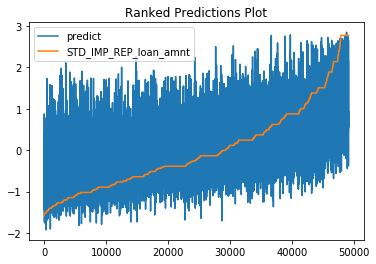

In [14]:
# plot top frame values
yhat_frame = test.cbind(loan_glm.predict(test))
print(yhat_frame[0:10, [y, 'predict']])

# plot sorted predictions
%matplotlib inline
yhat_frame_df = yhat_frame[[y, 'predict']].as_data_frame()
yhat_frame_df.sort_values(by=y, inplace=True)
yhat_frame_df.reset_index(inplace=True, drop=True)
ax = yhat_frame_df.plot(title='Ranked Predictions Plot', y='predict')
_ = yhat_frame_df.plot(y=y, ax=ax)

In [15]:
h2o.cluster().shutdown(prompt=True)

Are you sure you want to shutdown the H2O instance running at http://127.0.0.1:54321 (Y/N)? y
H2O session _sid_803a closed.
